In [3]:
## 2 Step: Mid-Day Examination.

%pip install geopandas

# Import necessary library
import geopandas as gpd

# Path to your GeoJSON file
file_path = "C:/Users/25077/Final/data/2020_PA_stops_buffer3_UTCI.geojson"

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(file_path)

import matplotlib.pyplot as plt

# Convert MULTIPOLYGON geometries to their centroids
gdf['geometry'] = gdf.geometry.centroid

# Reproject to WGS 84 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Load the city limits GeoJSON
city_limits_gdf = gpd.read_file("C:/Users/25077/Final/data/City_Limits.geojson")
city_limits_gdf = city_limits_gdf.to_crs(epsg=4326)  # Reproject if needed

In [4]:
# Import necessary libraries
import pandas as pd

# Function to filter necessary columns
def filter_13_mean(data):
   
    # Select necessary columns
    filtered_data = data[["stop_id", "stop_name", "13_mean", "geometry"]]
    return filtered_data

# Applying the function to the existing gdf
filtered_gdf = filter_13_mean(gdf)

# Display or save the filtered data
print(filtered_gdf)


     stop_id                             stop_name    13_mean  \
0         69             Front St & Market St Loop  37.893180   
1        359                    Market St & 6th St  37.907860   
2        428                  2nd St Station - MFL  37.825040   
3        638               5th St & Market St - FS  37.704560   
4        735                    7th St & Market St  35.379926   
...      ...                                   ...        ...   
8121   32318            Hunting Park Av & Front St  37.861160   
8122   32322            Hunting Park Av & Front St  38.254392   
8123   32323          Hunting Park Av & Bristol St  37.981067   
8124   32368  Hunting Park Av & Macalester St - FS  37.839459   
8125   32369       Hunting Park Av & Macalester St  38.072696   

                        geometry  
0     POINT (-75.14232 39.94977)  
1     POINT (-75.15024 39.95081)  
2     POINT (-75.14376 39.94979)  
3     POINT (-75.14876 39.95105)  
4     POINT (-75.15195 39.95080)  
...      

c:\Users\25077\miniforge3\envs\musa-550-fall-2023\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


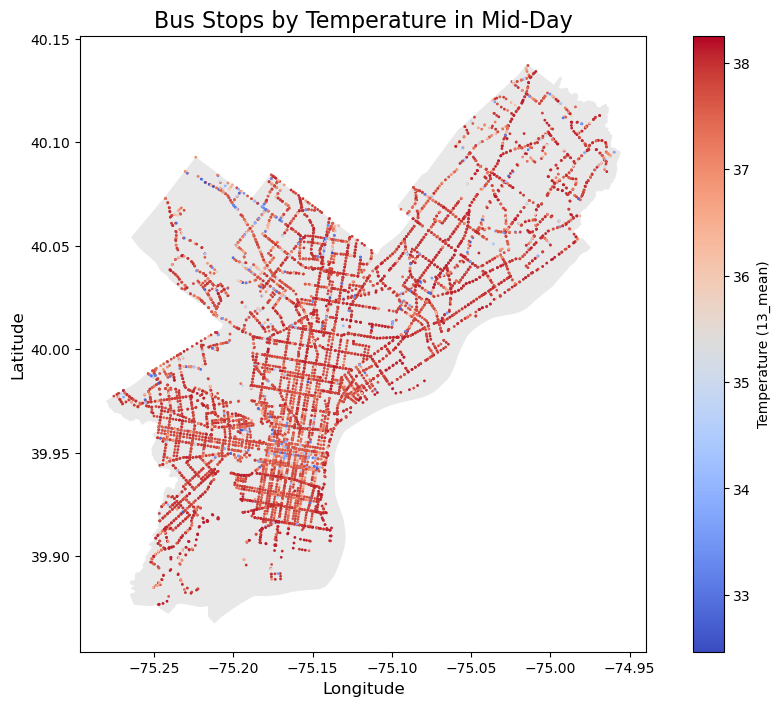

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your city limits data
city_limits_gdf = gpd.read_file("C:/Users/25077/Final/data/City_Limits.geojson")

# Ensure both GeoDataFrames use the same CRS
city_limits_gdf = city_limits_gdf.to_crs(epsg=4326)
filtered_gdf = filtered_gdf.to_crs(epsg=4326)

# Perform a spatial join to filter stops within the city limits
stops_within_city = gpd.sjoin(filtered_gdf, city_limits_gdf, op="within")

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.5, label="City Limits")

# Plot stops, color-coded by temperature (13_mean)
stops_within_city.plot(
    ax=ax,
    column="13_mean",
    cmap="coolwarm",
    legend=True,
    legend_kwds={"label": "Temperature (13_mean)"},
    markersize=1,
)

# Add titles and labels
plt.title("Bus Stops by Temperature in Mid-Day", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Display the plot
plt.show()


In [13]:
filtered_gdf.head()

,stop_id,stop_name,13_mean,geometry,x,y,cluster
0,69,Front St & Market St Loop,37.893180,POINT (-75.14232 39.94977),-75.142317,39.949765,-1
1,359,Market St & 6th St,37.907860,POINT (-75.15024 39.95081),-75.150237,39.950809,-1
2,428,2nd St Station - MFL,37.825040,POINT (-75.14376 39.94979),-75.143758,39.949795,-1
3,638,5th St & Market St - FS,37.704560,POINT (-75.14876 39.95105),-75.148760,39.951047,-1
4,735,7th St & Market St,35.379926,POINT (-75.15195 39.95080),-75.151949,39.950795,-1


C:\Users\25077\AppData\Local\Temp\ipykernel_36720\4235607243.py:39: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


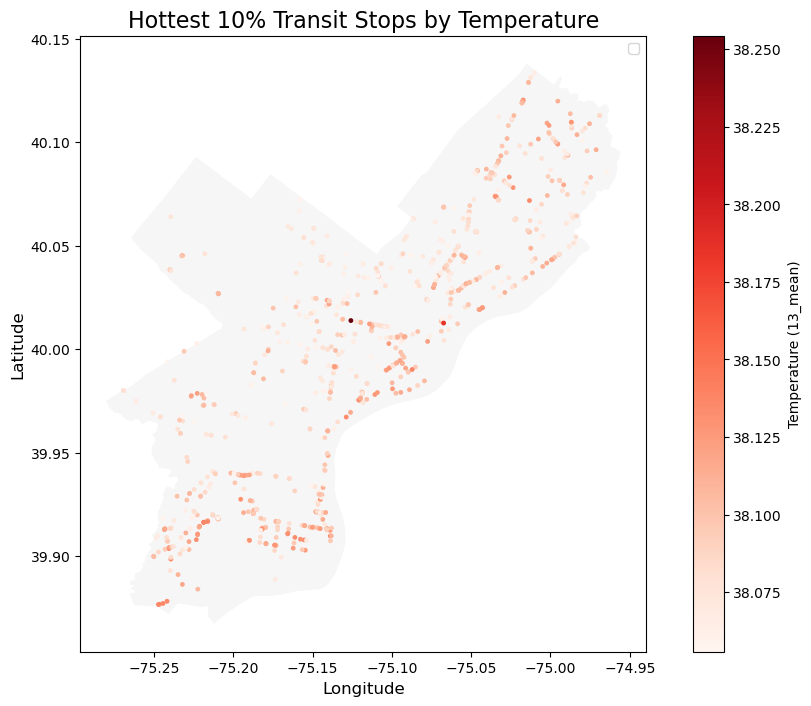

In [6]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


# Check for missing values and drop rows with NaN
filtered_gdf["x"] = filtered_gdf.geometry.x
filtered_gdf["y"] = filtered_gdf.geometry.y
filtered_gdf = filtered_gdf.dropna(subset=["x", "y", "13_mean"])

# Calculate the threshold for the hottest 10% stops
threshold = np.percentile(filtered_gdf["13_mean"], 90)

# Filter the hottest 10% stops
hottest_stops = filtered_gdf[filtered_gdf["13_mean"] >= threshold]

# Plot the hottest 10% stops
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.2, label="City Limits")

# Plot hottest stops
hottest_stops.plot(
    ax=ax,
    column="13_mean",
    cmap="Reds",
    legend=True,
    legend_kwds={"label": "Temperature (13_mean)"},
    markersize=6,
    alpha=1,
)

# Add titles and labels
plt.title("Hottest 10% Transit Stops by Temperature", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


C:\Users\25077\AppData\Local\Temp\ipykernel_36720\3189886705.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


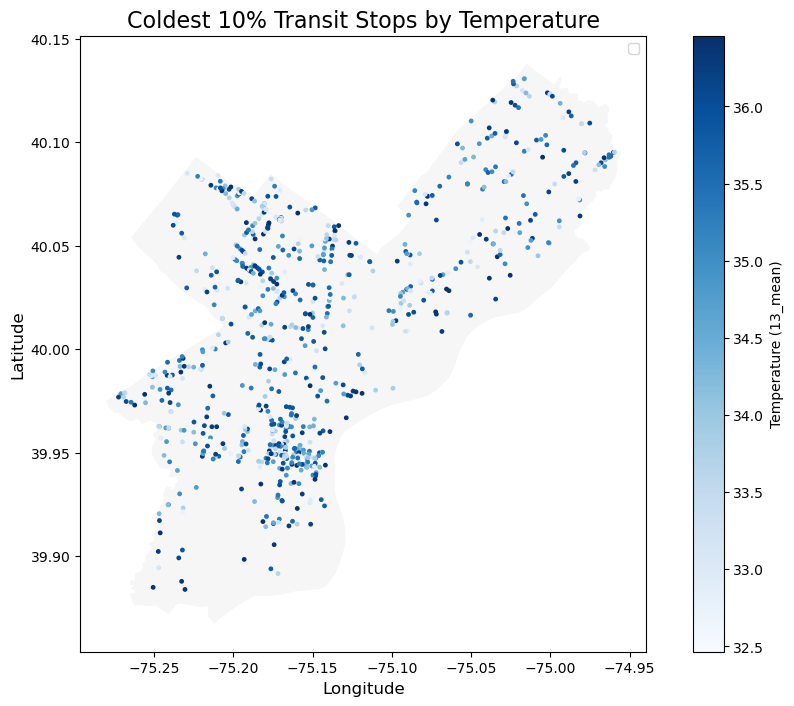

In [7]:
# Calculate the threshold for the coldest 10% stops
cold_threshold = np.percentile(filtered_gdf["13_mean"], 10)

# Filter the coldest 10% stops
coldest_stops = filtered_gdf[filtered_gdf["13_mean"] <= cold_threshold]

# Plot the coldest 10% stops
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.2, label="City Limits")

# Plot coldest stops
coldest_stops.plot(
    ax=ax,
    column="13_mean",
    cmap="Blues",
    legend=True,
    legend_kwds={"label": "Temperature (13_mean)"},
    markersize=6,
    alpha=1,
)

# Add titles and labels
plt.title("Coldest 10% Transit Stops by Temperature", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


c:\Users\25077\miniforge3\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Clusters found: [ 0 -1  2  1  4  3  5  6  7  8  9 10 12 11 13 14 15 16 17 18 19 20 21 22
 23 44 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Cluster sizes:
 -1     263
 25     70
 1      46
 17     43
 3      28
 12     25
 6      24
 31     19
 43     16
 18     14
 2      13
 5      13
 28     12
 7      11
 36     10
 24     10
 13     10
 16     10
 38      9
 10      9
 33      9
 42      9
 19      8
 20      8
 30      7
 0       7
 15      7
 14      7
 9       7
 34      6
 35      6
 40      6
 23      6
 41      5
 39      5
 8       5
 37      5
 44      5
 11      5
 32      5
 29      5
 21      5
 27      5
 26      5
 22      5
 4       3
Name: cluster, dtype: int64


C:\Users\25077\AppData\Local\Temp\ipykernel_36720\965146887.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


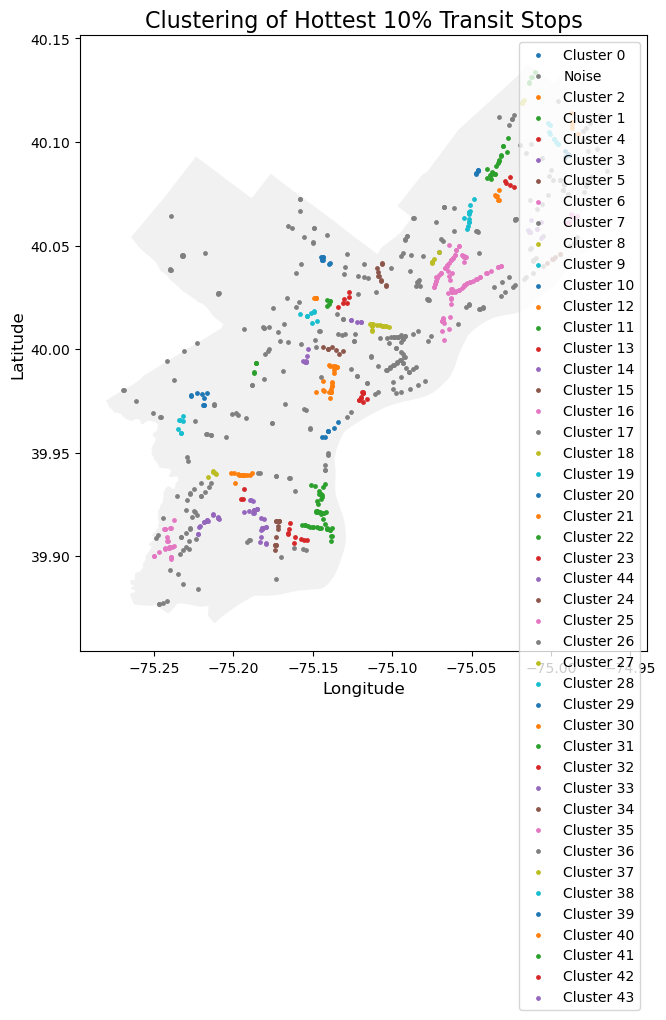

In [13]:
from sklearn.cluster import DBSCAN

# Extract coordinates for the hottest 10% stops
hottest_coordinates = hottest_stops[["x", "y"]].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=5, metric="euclidean")
hottest_stops["cluster"] = dbscan.fit_predict(hottest_coordinates)

# Check if clustering occurred
clusters = hottest_stops["cluster"].unique()
cluster_counts = hottest_stops["cluster"].value_counts()

print("Clusters found:", clusters)
print("Cluster sizes:\n", cluster_counts)

# Plot the clustering result
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.3, label="City Limits")

# Plot clustered points
for cluster_id in clusters:
    cluster_data = hottest_stops[hottest_stops["cluster"] == cluster_id]
    if cluster_id == -1:  # Noise points
        cluster_label = "Noise"
        cluster_color = "grey"
    else:
        cluster_label = f"Cluster {cluster_id}"
        cluster_color = None
    cluster_data.plot(
        ax=ax,
        color=cluster_color,
        markersize=6,
        label=cluster_label,
    )

# Add titles and labels
plt.title("Clustering of Hottest 10% Transit Stops", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


c:\Users\25077\miniforge3\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Clusters found: [ 0  1 -1  2  3  4  5  6  7  8  9 13 23 10 11 12 17 14 15 16 18 19 20 21
 22 24 25 26 27]
Cluster sizes:
 -1     362
 0     131
 17     43
 22     30
 19     30
 15     30
 4      18
 23     17
 7      14
 27     12
 11     10
 6      10
 21     10
 2       8
 10      7
 5       7
 20      7
 3       6
 25      6
 24      6
 9       6
 18      6
 13      5
 14      5
 12      5
 1       5
 8       5
 26      5
 16      5
Name: cluster, dtype: int64


C:\Users\25077\AppData\Local\Temp\ipykernel_36720\3429609326.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


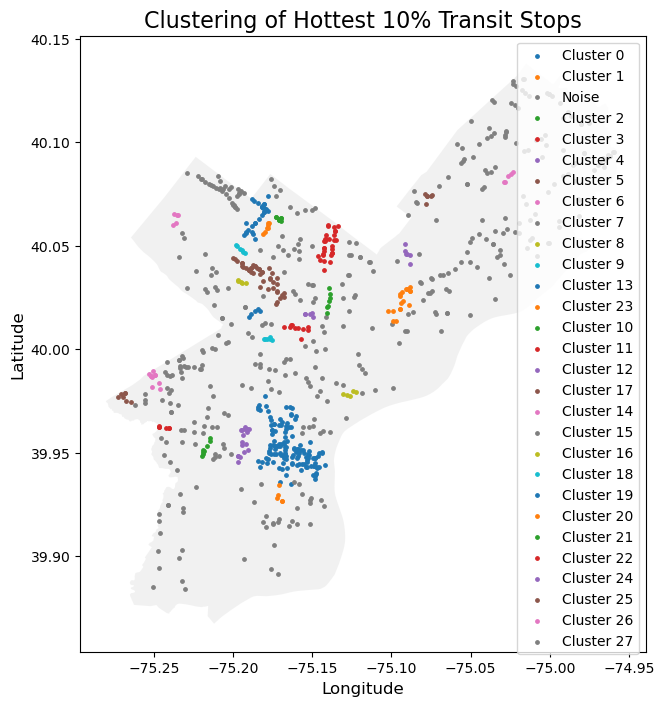

In [14]:
from sklearn.cluster import DBSCAN

# Extract coordinates for the hottest 10% stops
coldest_coordinates = coldest_stops[["x", "y"]].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=5, metric="euclidean")
coldest_stops["cluster"] = dbscan.fit_predict(coldest_coordinates)

# Check if clustering occurred
clusters = coldest_stops["cluster"].unique()
cluster_counts = coldest_stops["cluster"].value_counts()

print("Clusters found:", clusters)
print("Cluster sizes:\n", cluster_counts)

# Plot the clustering result
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.3, label="City Limits")

# Plot clustered points
for cluster_id in clusters:
    cluster_data = coldest_stops[coldest_stops["cluster"] == cluster_id]
    if cluster_id == -1:  # Noise points
        cluster_label = "Noise"
        cluster_color = "grey"
    else:
        cluster_label = f"Cluster {cluster_id}"
        cluster_color = None
    cluster_data.plot(
        ax=ax,
        color=cluster_color,
        markersize=6,
        label=cluster_label,
    )

# Add titles and labels
plt.title("Clustering of Hottest 10% Transit Stops", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()
